# Importing The Libraries :

In [1]:
import numpy as np
import pandas as pd

# Importing  The  Dataset :

In [2]:
ds=pd.read_csv(r'bank.csv')

In [3]:
ds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Visualization:

In [4]:
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

### Visualize the Age with Deposit: 

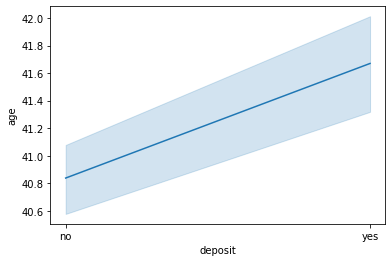

In [5]:
sea.lineplot(x="deposit",y="age",data=ds)

### Visualize Balance with Deposit:

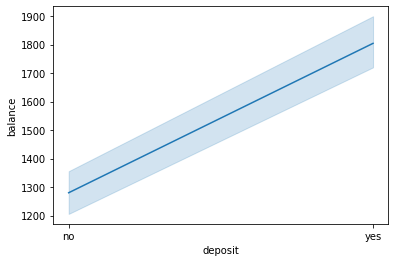

In [6]:
sea.lineplot(x="deposit",y="balance",data=ds)

### Visualize Duration with Deposit:

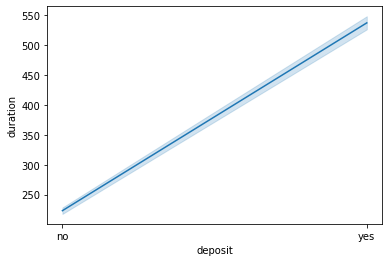

In [7]:
sea.lineplot(x="deposit",y="duration",data=ds)

### Visualize Day with Deposit:

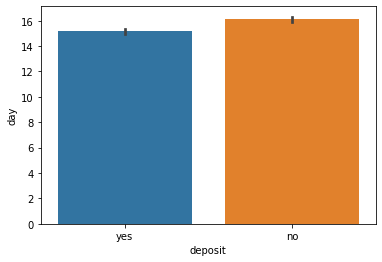

In [8]:
sea.barplot(x="deposit",y="day",data=ds)

### Visualize Campaign with Deposit:

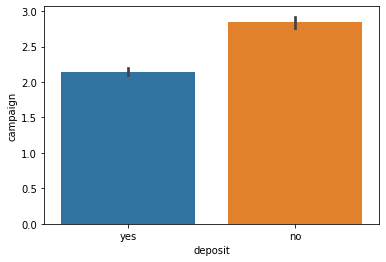

In [9]:
sea.barplot(x="deposit",y="campaign",data=ds)

### Visualize pdays with Deposit:

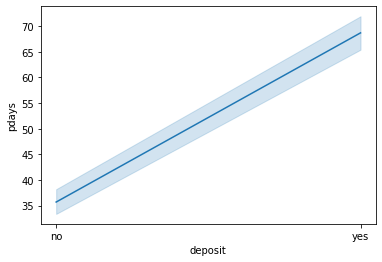

In [10]:
sea.lineplot(x="deposit",y="pdays",data=ds)

### Visualize Previous with Deposit:

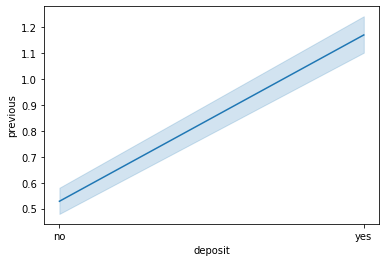

In [11]:
sea.lineplot(x="deposit",y="previous",data=ds)

# Checking  For  Missing  Data :

In [12]:
ds.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

# Label Encoding :

In [13]:
ds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['education']=le.fit_transform(ds['education'])
ds['loan']=le.fit_transform(ds['loan'])
ds['deposit']=le.fit_transform(ds['deposit'])
ds['housing']=le.fit_transform(ds['housing'])
ds['default']=le.fit_transform(ds['default'])
ds['month']=le.fit_transform(ds['month'])
ds['job']=le.fit_transform(ds['job'])
ds['poutcome']=le.fit_transform(ds['poutcome'])
ds['contact']=le.fit_transform(ds['contact'])
ds['marital']=le.fit_transform(ds['marital'])

In [15]:
ds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


# One Hot Encoding:

In [16]:
x=ds.iloc[:,0:16].values
y=ds.iloc[:,16:17].values

In [17]:
from sklearn.preprocessing import OneHotEncoder   #only strings values are converted not numerical
one=OneHotEncoder()
p=one.fit_transform(x[:,1:2]).toarray()
q=one.fit_transform(x[:,2:3]).toarray()
r=one.fit_transform(x[:,3:4]).toarray()
s=one.fit_transform(x[:,8:9]).toarray()
t=one.fit_transform(x[:,10:11]).toarray()
v=one.fit_transform(x[:,15:16]).toarray()
x=np.delete(x,[1,2,3,8,10,15],axis=1)
x=np.concatenate((v,t,s,r,q,p,x),axis=1)

In [18]:
x.shape

(11162, 48)

# Splitting The Dataset Into Train set And Test set: 

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Feature Scaling:

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Training And Testing The Model:

In [21]:
from sklearn.ensemble import RandomForestClassifier
rrc=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rrc.fit(x_train,y_train)

C:\Users\kuram\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:
import pickle
pickle.dump(rrc,open("bank.pkl","wb"))

In [30]:
y_pred  = rrc.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1008,  197],
       [ 130,  898]], dtype=int64)

In [31]:
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [32]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [24]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

# Evaluation:

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8535602328705777

Text(0.5, 0, 'fpr')

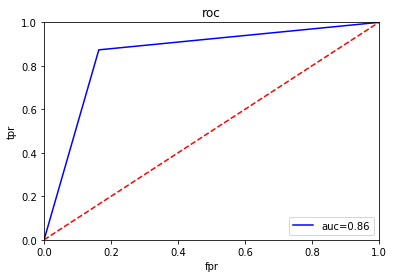

In [26]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label='auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')

### DONE